Hello!
In the cell below I have written a random walk code:
The code models how an object (e.g. ball, atom) gets propagated from node to node (e.g. person, surface site etc.) in a random manner. The model has 4 possible directions (with equal probability) from each node for simplicity.
The code is by no means "clean" and doesn't use shortcuts that could be used to shorten the code.

In [2]:
import random
#The function below returns the x, y coordinates after a "n" step long random walk
def randomwalk(n):
    x = 0
    y = 0
    for i in range(n):
        step = random.choice(['up','down','left','right'])
        if step == 'up':
            y = y + 1
        elif step == 'down':
            y = y - 1
        elif step == 'left':
            x = x - 1
        elif step == 'right':
            x = x + 1
    return(x,y)
#Here I randomly decide to do randomly 100 moves and see where I end up
walk = randomwalk(100)
print(walk)
print() # empty line for clarity
#Here I do 10 times a 100 step random walk
for i in range(10):
    walk = randomwalk(100)
    print(walk)


(-3, -3)

(-10, -10)
(-4, 2)
(9, -17)
(11, -1)
(0, 2)
(-3, -9)
(8, 4)
(-11, 3)
(1, -11)
(3, 9)


I suppose one could then do thousands of these random walks to see how far an object finds itself from the initial node on average after n steps.Now, we can change the previous code slightly to turn it into a kMC model.


In [3]:
import math
def randomwalk():
    t=0
    x = 0
    y = 0
    while t<2:
        step = random.choice(['up','down','left','right'])
        #Here I invert the [0,1) interval of the random.random() to (0,1] to ensure we don't have the possibility of ln(0)
        r=1-random.random()
        #I chose the total rate to be 1 (0.25+0.25+0.25+0.25)
        t=t-math.log(r)/1
        if step == 'up':
            y = y + 1
        elif step == 'down':
            y = y - 1
        elif step == 'left':
            x = x - 1
        elif step == 'right':
            x = x + 1
        print(x,y)
        print(t)
    return(x,y)
walk=randomwalk()
print(walk)

0 -1
0.00924848787148407
0 0
0.5648454559526809
0 -1
1.4139573384070117
0 -2
2.417793272978453
(0, -2)


Now, this code can be also written in a more "pythonny" way, the code below does nearly the same thing as the code in the cell above


In [4]:
import random
import math
def random_walk():
    t = 0
    position = [0,0] #initial position, x=0 and y=0
    movements = [[0,1],[0,-1],[1,0],[-1,0]] # right,left, up,down
    while t < 2:
        step = random.choice(movements)
        random_var = 1-random.random()
        t = t- math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        print(position)
        print(t)
random_walk()

[-1, 0]
0.09230615231000147
[0, 0]
1.4668139192829561
[-1, 0]
2.3550175649950384


Now, this is already cool and the code obviously works. However, it would be nice for it to generate a list with the coordinates at each step; this could then be plotted to see how the  object moves randomly. I haven't managed to do this yet.

In [1]:
import random
import math
import copy
def random_walk():
    t = 0
    position = [0,0] #initial position, x=0 and y=0
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0]] # up,down, right,down
    while t < 2:
        step = random.choice(movements)
        random_var = 1-random.random()
        t = t- math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        print(position)
        list_of_positions.append(copy.copy(position))
        print(t)
    return(list_of_positions)
the_list = copy.copy(random_walk())
print(the_list)

[0, 1]
0.7926621681292835
[0, 0]
0.8927380959091786
[0, 1]
1.250951727688565
[-1, 1]
2.9123248240186035
[[0, 1], [0, 0], [0, 1], [-1, 1]]


In [4]:
import random
import math
import copy
def random_walk():
    time = 0
    position = [0,0] #initial position, x=0 and y=0
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]] # up,down,right,left,up-right,up-left,down-right,
    while time < 2:
        step = random.choice(movements)
        random_var = 1-random.random()
        time = time- math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        print(position)
        list_of_positions.append(copy.copy(position))
        print(time)
    return(list_of_positions)
the_list = copy.copy(random_walk())
print(the_list)

[-1, 0]
0.9055428540814477
[-2, 1]
1.5265329935423324
[-2, 0]
2.3352800132094873
[[-1, 0], [-2, 1], [-2, 0]]


[43, 96]


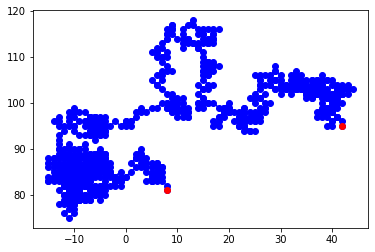

In [26]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100)
    b= random.randint(1,100)
    print([a,b])
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]]
    while time < 1000:
        step = random.choice(movements)
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
    
plt.show()